In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Dataset/sample_submission.csv
/kaggle/input/Dataset/Test.csv
/kaggle/input/Dataset/Train.csv


<h1 align="center"><u><b> Employee Attrition Rate Predictor</b></u></h1>
<h3 align="center"> Hackerearth machine learning challenge </h3>

### Problem Statement:
Employees are the most important part of an organization. Successful employees meet deadlines, make sales, and build the brand through positive customer interactions.

Employee attrition is a major cost to an organization and predicting such attritions is the most important requirement of the Human Resources department in many organizations. In this problem, your task is to predict the attrition rate of employees of an organization.

In [5]:
train_dataset_path = "/kaggle/input/Dataset/Train.csv"
test_dataset_path  = "/kaggle/input/Dataset/Test.csv"

In [80]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Data visualistaion libraries
import seaborn as sns
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
%matplotlib inline

# Machine learning libraries
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

# Machine Learning Models
from sklearn.ensemble import RandomForestRegressor

In [7]:
# Both training and testing data
training_dataframe = pd.read_csv(train_dataset_path,index_col="Employee_ID")
testing_dataframe  = pd.read_csv(test_dataset_path,index_col ="Employee_ID")

### To gain a insight into the data

In [8]:
training_dataframe.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
count,6588.000000,7000.000000,6856.000000,7000.000000,7000.000000,7000.000000,7000.000000,6991.000000,6989.000000,7000.000000,6423.000000,7000.000000,6344.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,39.622799,3.187857,13.385064,2.367143,47.064286,0.817857,2.798000,6.006294,2.387895,3.098571,-0.008126,-0.013606,1.891078,2.834143,7.101286,3.257000,0.189376
std,13.606920,1.065102,10.364188,1.149395,15.761406,0.648205,1.163721,2.058435,1.122786,0.836377,0.989850,0.986933,0.529403,0.938945,1.164262,0.925319,0.185753
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000,0.000000
25%,27.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,-0.961200,-0.453700,2.000000,2.000000,6.000000,3.000000,0.070400
50%,37.000000,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,3.000000,-0.104800,-0.453700,2.000000,3.000000,7.000000,3.000000,0.142650
75%,52.000000,4.000000,21.000000,3.000000,61.000000,1.000000,3.000000,8.000000,3.000000,3.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000,0.235000
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000,0.995900


In [9]:
print(training_dataframe)

            Gender   Age  Education_Level Relationship_Status     Hometown  \
Employee_ID                                                                  
EID_23371        F  42.0                4             Married     Franklin   
EID_18000        M  24.0                3              Single  Springfield   
EID_3891         F  58.0                3             Married      Clinton   
EID_17492        F  26.0                3              Single      Lebanon   
EID_22534        F  31.0                1             Married  Springfield   
...            ...   ...              ...                 ...          ...   
EID_16328        F  23.0                5             Married     Franklin   
EID_8387         F  44.0                1             Married      Lebanon   
EID_8077         F  49.0                3              Single  Springfield   
EID_19597        F  47.0                3             Married   Washington   
EID_1640         F  58.0                3             Married   

In [10]:
print(training_dataframe.Travel_Rate)

Employee_ID
EID_23371    1
EID_18000    0
EID_3891     0
EID_17492    1
EID_22534    1
            ..
EID_16328    1
EID_8387     0
EID_8077     1
EID_19597    1
EID_1640     0
Name: Travel_Rate, Length: 7000, dtype: int64


In [11]:
# All the columns
print(training_dataframe.columns)

Index(['Gender', 'Age', 'Education_Level', 'Relationship_Status', 'Hometown',
       'Unit', 'Decision_skill_possess', 'Time_of_service',
       'Time_since_promotion', 'growth_rate', 'Travel_Rate', 'Post_Level',
       'Pay_Scale', 'Compensation_and_Benefits', 'Work_Life_balance', 'VAR1',
       'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7', 'Attrition_rate'],
      dtype='object')


#### First and last few rows

In [12]:
training_dataframe.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
Employee_ID,,,,,,,,,,,,,,,,,,,,,
EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [13]:
training_dataframe.tail()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
Employee_ID,,,,,,,,,,,,,,,,,,,,,
EID_16328,F,23.0,5,Married,Franklin,Operarions,Behavioral,4.0,1,20,...,type3,3.0,1,0.7516,-0.4537,2.0,3,7,3,0.7839
EID_8387,F,44.0,1,Married,Lebanon,R&D,Analytical,16.0,2,59,...,type3,3.0,2,-0.1048,-2.7762,2.0,4,8,4,0.1055
EID_8077,F,49.0,3,Single,Springfield,IT,Directive,10.0,1,59,...,type2,4.0,2,-0.1048,-0.4537,2.0,4,8,3,0.7847
EID_19597,F,47.0,3,Married,Washington,Sales,Behavioral,24.0,1,21,...,type0,2.0,4,0.7516,1.8688,2.0,3,6,3,0.4162
EID_1640,F,58.0,3,Married,Franklin,IT,Directive,22.0,2,74,...,type2,3.0,3,-0.1048,-1.6150,3.0,4,5,3,0.0910


## Preprocessing and Data Wrangling

To deal with columns having missing values we will perform imputation on the column with missing data. We might have dropped the column entirely but in that case the model might lost a lot of data, unless most values of the dropped column are missing.
We will first of all find out the colunms with missing data.

### Missing Values

In [14]:
## Columns with missing values
cols_with_missing = [col for col in training_dataframe.columns if training_dataframe[col].isnull().any()]
print(cols_with_missing)

['Age', 'Time_of_service', 'Pay_Scale', 'Work_Life_balance', 'VAR2', 'VAR4']


We will try to perform imputation on the missing values. But before imputation we will have to check for categorical values.

### Categorical Values
To deal with categorical values we can drop the column if not necessary, label encode the variables or perform ohe hot encoding.

In [15]:
# Get a list of categorical columns

s = (training_dataframe.dtypes == 'object')
object_cols = list(s[s].index)
print(object_cols)

['Gender', 'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess', 'Compensation_and_Benefits']


In [16]:
# Remove rows with missing target, separate target from predictors in training data
X_train_full = training_dataframe

X_train_full.dropna(axis=0, subset=['Attrition_rate'], inplace=True, how = "any")
y_train_full = X_train_full.Attrition_rate
# X_train_full.drop(['Attrition_rate'], axis=1, inplace=True)


X_train_full.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
Employee_ID,,,,,,,,,,,,,,,,,,,,,
EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


Now we will label encode the categorical columns. Fitting a label encoder to a column in the training data creates a corresponding integer-valued label for each unique value that appears in the training data. In case, the validation data contains values that don't also appear in the training data, the encoder will throw an error, because these values won't have an integer assigned to them.

In [17]:
X_valid_full = testing_dataframe

labelEncoder = LabelEncoder()
for col in object_cols:
    X_train_full[col] = labelEncoder.fit_transform(X_train_full[col])
    X_valid_full[col] = labelEncoder.transform(X_valid_full[col])
    

In [18]:
X_train_full.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
Employee_ID,,,,,,,,,,,,,,,,,,,,,
EID_23371,0,42.0,4,0,1,2,2,4.0,4,33,...,2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
EID_18000,1,24.0,3,1,3,3,0,5.0,4,36,...,2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
EID_3891,0,58.0,3,0,0,8,2,27.0,3,51,...,2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
EID_17492,0,26.0,3,1,2,1,1,4.0,3,56,...,2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
EID_22534,0,31.0,1,0,3,3,2,5.0,4,62,...,3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [19]:
X_valid_full.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
Employee_ID,,,,,,,,,,,,,,,,,,,,,
EID_22713,0,32.0,5,1,3,9,2,7.0,4,30,...,4.0,2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
EID_9658,1,65.0,2,1,2,2,3,41.0,2,72,...,1.0,2,1.0,4,-0.9612,0.7075,1.0,2,8,2
EID_22203,1,52.0,3,0,3,10,3,21.0,3,25,...,8.0,3,1.0,4,-0.1048,0.7075,2.0,1,9,3
EID_7652,1,50.0,5,1,4,4,0,11.0,4,28,...,2.0,0,4.0,3,-0.1048,0.7075,2.0,2,8,3
EID_6516,0,44.0,3,0,1,9,2,12.0,4,47,...,2.0,2,4.0,4,1.6081,0.7075,2.0,2,7,4


## Imputation

In [20]:
si = SimpleImputer(strategy='median')
X_train_imputed = pd.DataFrame(si.fit_transform(X_train_full))
# It is important to fit_transform the training data


X_train_imputed.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.0,42.0,4.0,0.0,1.0,2.0,2.0,4.0,4.0,33.0,...,2.0,3.0,4.0,0.7516,1.8688,2.0,4.0,5.0,3.0,0.1841
1,1.0,24.0,3.0,1.0,3.0,3.0,0.0,5.0,4.0,36.0,...,2.0,4.0,3.0,-0.9612,-0.4537,2.0,3.0,5.0,3.0,0.0670
2,0.0,58.0,3.0,0.0,0.0,8.0,2.0,27.0,3.0,51.0,...,2.0,1.0,4.0,-0.9612,-0.4537,3.0,3.0,8.0,3.0,0.0851
3,0.0,26.0,3.0,1.0,2.0,1.0,1.0,4.0,3.0,56.0,...,2.0,1.0,3.0,-1.8176,-0.4537,2.0,3.0,7.0,3.0,0.0668
4,0.0,31.0,1.0,0.0,3.0,3.0,2.0,5.0,4.0,62.0,...,3.0,3.0,1.0,0.7516,-0.4537,2.0,2.0,8.0,2.0,0.1827


***Imputation removes column names so we wil have to put them back***

In [21]:
# Imputation removed column names; they have to be put back
X_train_imputed.columns = X_train_full.columns
# X_train_imputed.index = X_train_full.index
print("shape of X_train_imputed = ",X_train_imputed.shape)

shape of X_train_imputed =  (7000, 23)


In [22]:
print("shape of y_train_full = ",y_train_full.shape)

shape of y_train_full =  (7000,)


In [102]:
print("Shape of X_valid_full = ",X_valid_full.shape )

Shape of X_valid_full =  (3000, 22)


In [23]:
X_train_imputed.head()


,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,0.0,42.0,4.0,0.0,1.0,2.0,2.0,4.0,4.0,33.0,...,2.0,3.0,4.0,0.7516,1.8688,2.0,4.0,5.0,3.0,0.1841
1,1.0,24.0,3.0,1.0,3.0,3.0,0.0,5.0,4.0,36.0,...,2.0,4.0,3.0,-0.9612,-0.4537,2.0,3.0,5.0,3.0,0.0670
2,0.0,58.0,3.0,0.0,0.0,8.0,2.0,27.0,3.0,51.0,...,2.0,1.0,4.0,-0.9612,-0.4537,3.0,3.0,8.0,3.0,0.0851
3,0.0,26.0,3.0,1.0,2.0,1.0,1.0,4.0,3.0,56.0,...,2.0,1.0,3.0,-1.8176,-0.4537,2.0,3.0,7.0,3.0,0.0668
4,0.0,31.0,1.0,0.0,3.0,3.0,2.0,5.0,4.0,62.0,...,3.0,3.0,1.0,0.7516,-0.4537,2.0,2.0,8.0,2.0,0.1827


## Data Visualization and analysis

### 1. First let's checkout the relation between attrition rate and Age

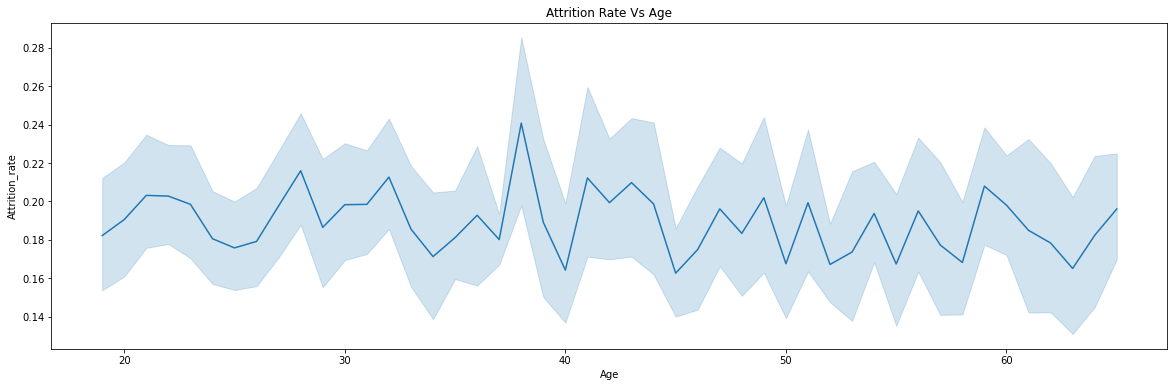

In [24]:
data = X_train_imputed
ind_var = y_train_full

plt.figure(figsize=(20,6))
plt.title("Attrition Rate Vs Age")

sns.lineplot(y=data["Attrition_rate"],x=data["Age"])

**From this trend it is evident that employee attrition rate is more profound between the age of 35 to 40**. This may be due to a variety of factors such as low work life ballance or less job satisfaction

### 2. Let us consider the factor of time since last promotion which might help us gain further insights to justify our previous assumption.

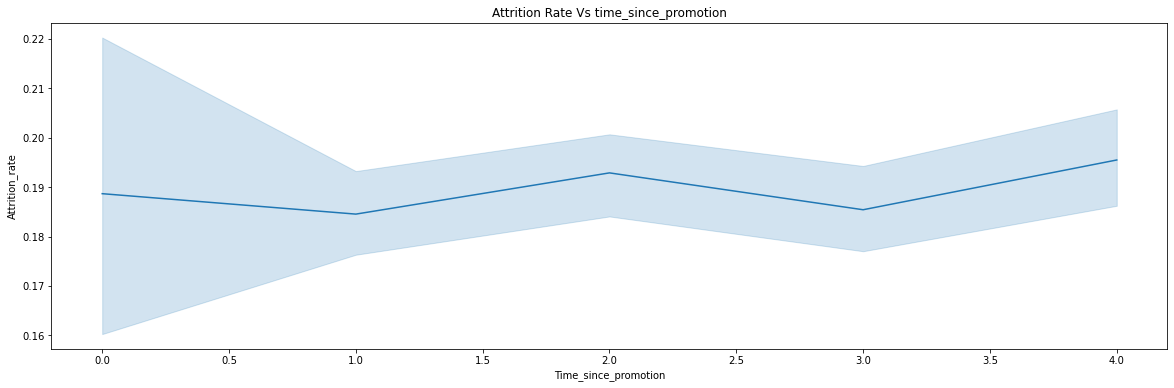

In [25]:
plt.figure(figsize=(20,6))
plt.title("Attrition Rate Vs time_since_promotion")
sns.lineplot(y=data["Attrition_rate"],x=data["Time_since_promotion"])

**We see that the attrition rate is not much dependent on the time since last promotion but increases a little bit if gap increases more than 3.5 years**

### 3. **Next let's see the effect of time of sevice on the attrition rate of the employee**

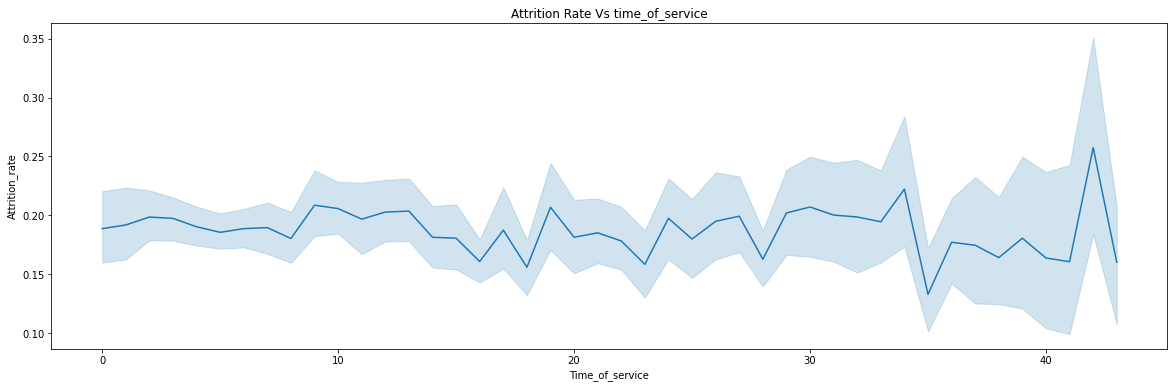

In [26]:
plt.figure(figsize=(20,6))
plt.title("Attrition Rate Vs time_of_service")
sns.lineplot(y=data["Attrition_rate"],x=data["Time_of_service"])

**This relationship may be better understood using a 2D KDE plot**

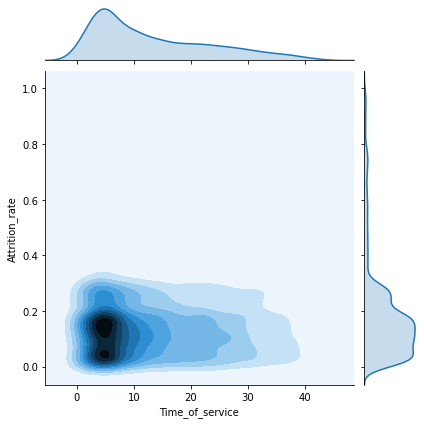

In [27]:
sns.jointplot(x=data["Time_of_service"],y=data["Attrition_rate"],kind="kde")

**This plot shows a strong relation between the two variables. Atrrition rate remains very low for low years of service but changes on increasing the term of service. This will be a very nice feature variable for our prediction**

### 4. **Lets us also compare the atrition rates for male and female employees.**

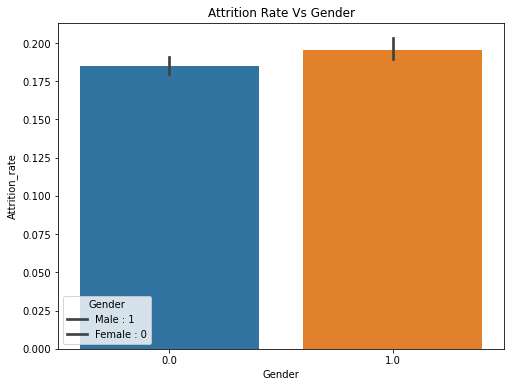

In [28]:
plt.figure(figsize= (8,6))
plt.title("Attrition Rate Vs Gender")
sns.barplot(y=data["Attrition_rate"],x=data["Gender"])
plt.legend(title='Gender', loc='lower left', labels=['Male : 1', 'Female : 0'])

**From this bar plot it is evident that that Male are more likely to leave an organisation than their female counterparts. Still then the difference is not huge enough to have any signifigant contribution to the attrition rates.**

### 5. **Next let us undersatnd the effects of eductaion level on our target variable i.e attrition rate. We may expect a linear realtionship.**

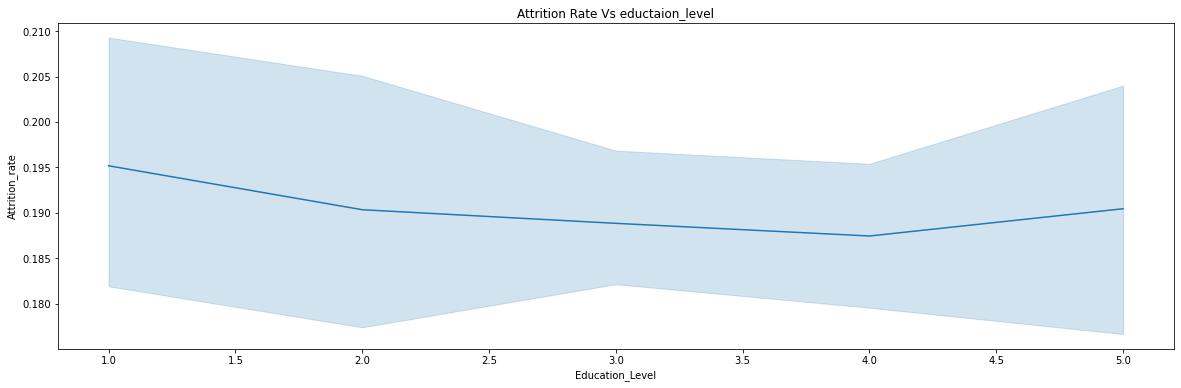

In [29]:
plt.figure(figsize=(20,6))
plt.title("Attrition Rate Vs eductaion_level")
sns.lineplot(y=data["Attrition_rate"],x=data["Education_Level"])

**From the plot it is evident that attrition rates increases with a low level of education but the curve flatens out with an increase in the level of education. This maybe an important feature for predicting our target variable.**

### 6. **Let us understand the most important factor in prediction the attrition rates in a company. This may be the work life balance score. We may assume the trend to be linear. Let's see what the stats have to say about this**

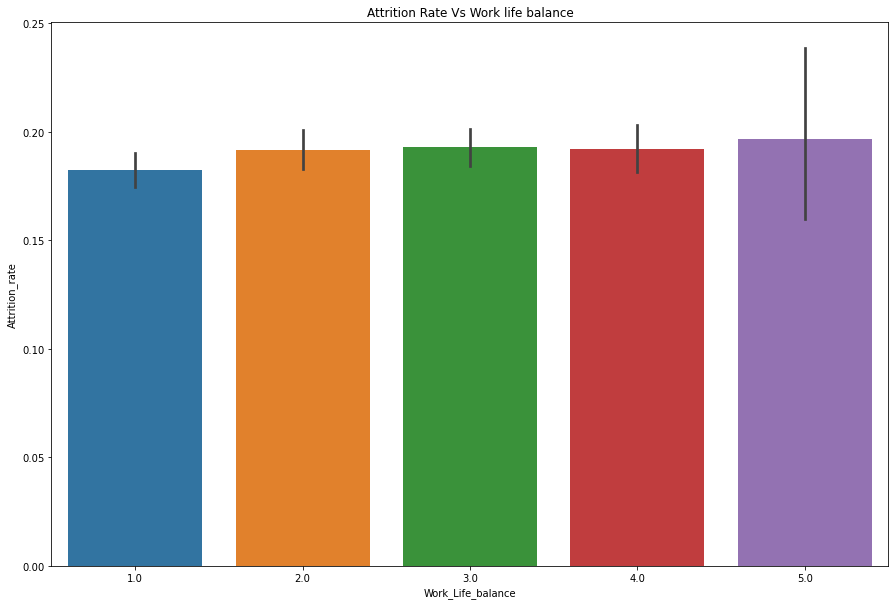

In [30]:
plt.figure(figsize= (15,10))
plt.title("Attrition Rate Vs Work life balance")
sns.barplot(y=data["Attrition_rate"],x=data["Work_Life_balance"])

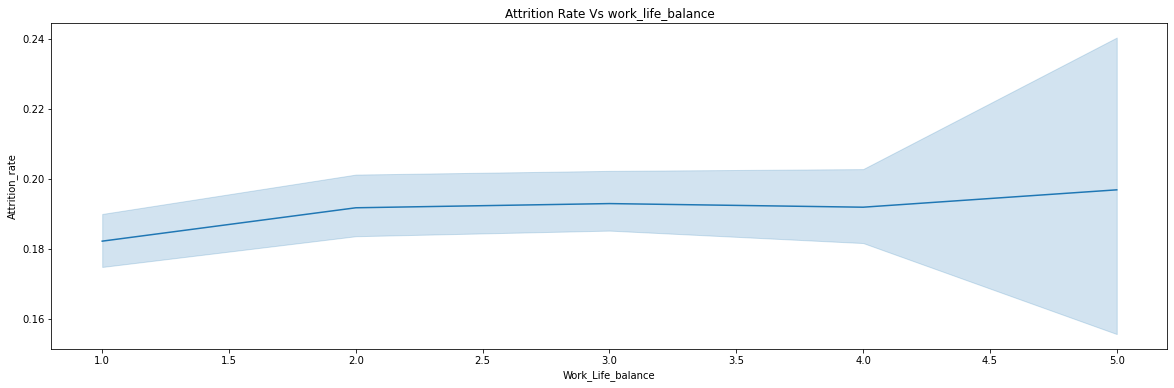

In [31]:
plt.figure(figsize=(20,6))
plt.title("Attrition Rate Vs work_life_balance")
sns.lineplot(y=data["Attrition_rate"],x=data["Work_Life_balance"])

**In sharp contrast to our assumption work life balance doesnt account much towards the attrition rates of employees. There is a slight change in the rates with an increase in rates but it will not contribute much to our model**

### 7. Now we should analyze the growth rate of an employee in an organisation. Let's assume that the attrition rates will be inversely proportional to the growth rate

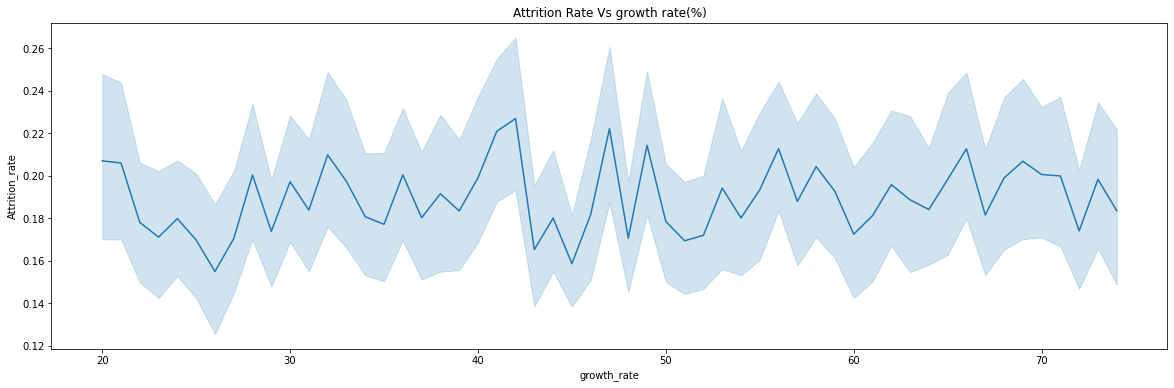

In [32]:
plt.figure(figsize=(20,6))
plt.title("Attrition Rate Vs growth rate(%)")
sns.lineplot(y=data["Attrition_rate"],x=data["growth_rate"])

**This plot shows a strong relation between attrition Rate and growth rate. This is in sharp contrast to our earlier assumption.This can be further understood using a 2D Kde plot**

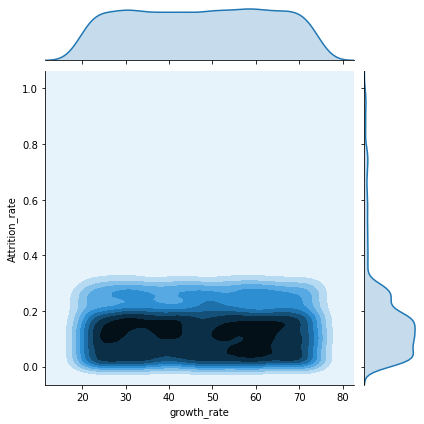

In [33]:
sns.jointplot(x=data["growth_rate"],y=data["Attrition_rate"],kind="kde")

**From this 2D KDE plot it is evident that attrition rate is maximum between a growth rate of 20 - 40 and 50 - 70. HEnce this would be an important variable in the prediction of the the target.**

### 8. **Relationship between attrition rates and the job unit.**

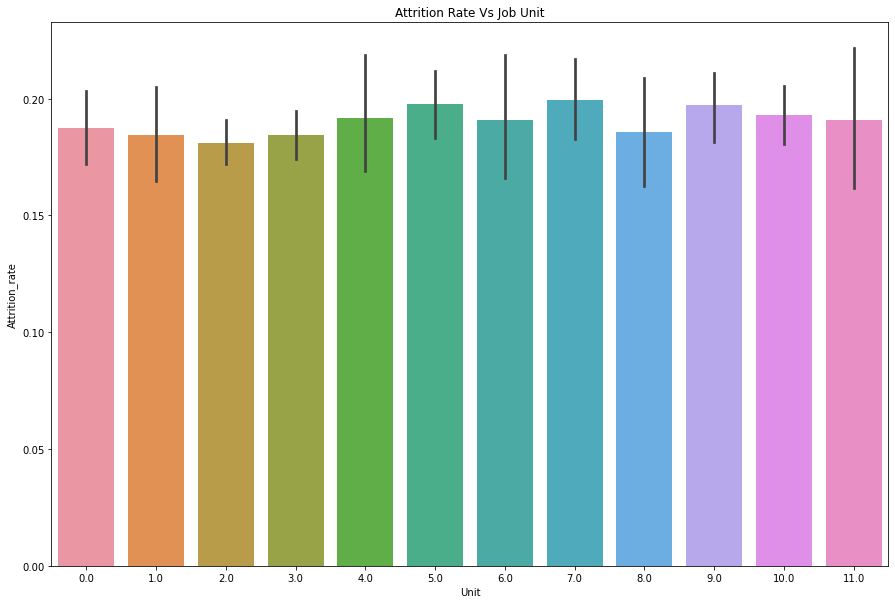

In [34]:
plt.figure(figsize= (15,10))
plt.title("Attrition Rate Vs Job Unit")
sns.barplot(y=data["Attrition_rate"],x=data["Unit"])

**Thus the job department or unit such as IT, logistics, Quality control and HR is a good feature for prediction of our target**

### 9. **Next in our list is a very important factor: Pay Scale.**

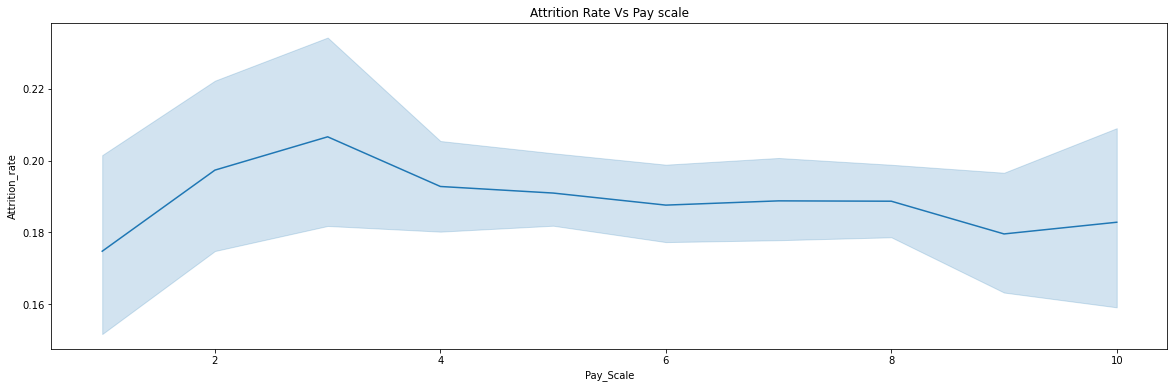

In [35]:
plt.figure(figsize=(20,6))
plt.title("Attrition Rate Vs Pay scale")
sns.lineplot(y=data["Attrition_rate"],x=data["Pay_Scale"])

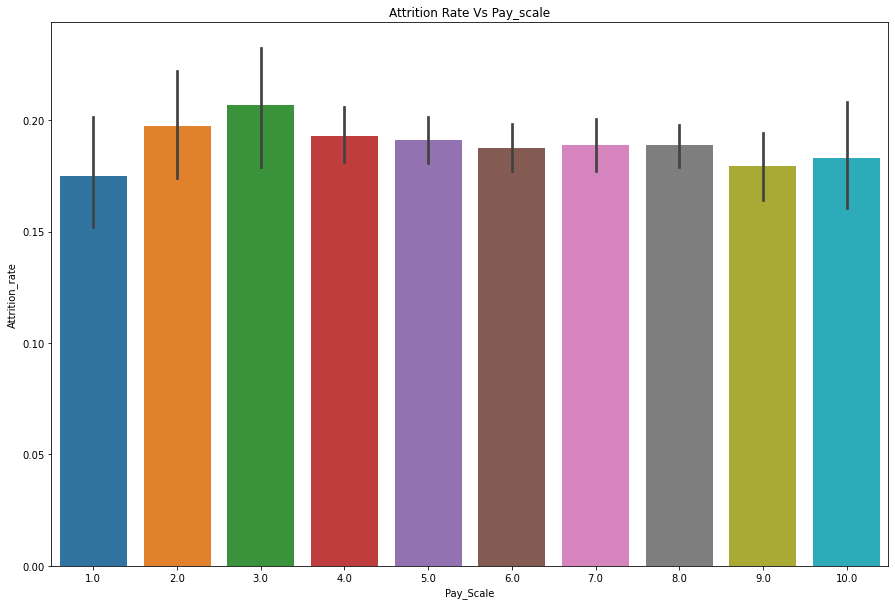

In [36]:
plt.figure(figsize= (15,10))
plt.title("Attrition Rate Vs Pay_scale")
sns.barplot(y=data["Attrition_rate"],x=data["Pay_Scale"])

**Initially there is a linear relationship between the attrition rates and pay scale (till 3) then it slowly decreases and becomes stable over rest of the values. Pay scale will be an interesting feature for our model.**

### 10. Next is the realtionship with decision making skills of the employess.

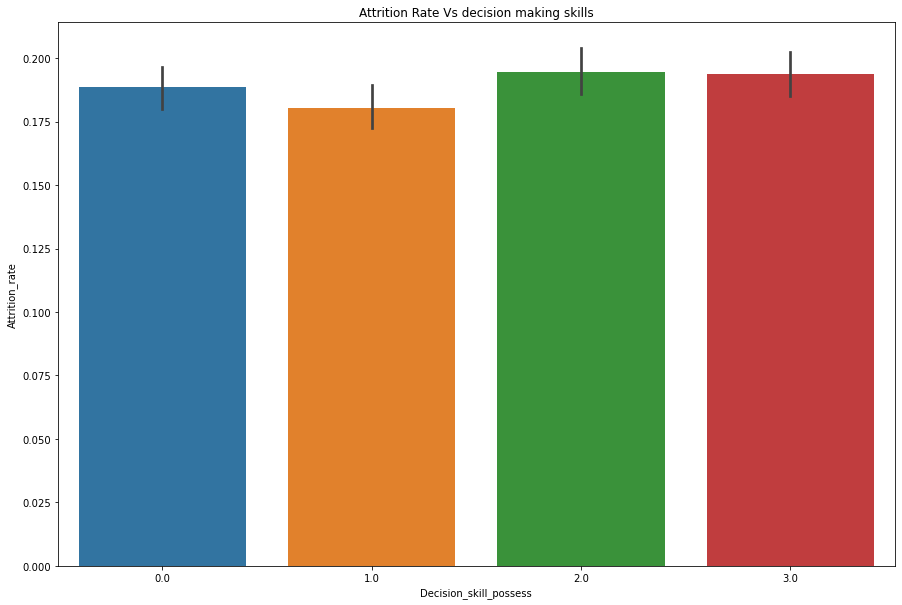

In [37]:
plt.figure(figsize= (15,10))
plt.title("Attrition Rate Vs decision making skills")
sns.barplot(y=data["Attrition_rate"],x=data["Decision_skill_possess"])

**As we see there is not much variation with the attrition rates in comparision with the decision making skills of the employees, we can safely not include this column in our model training.**

### 11. Next let's check the effect of travel on attrition rates

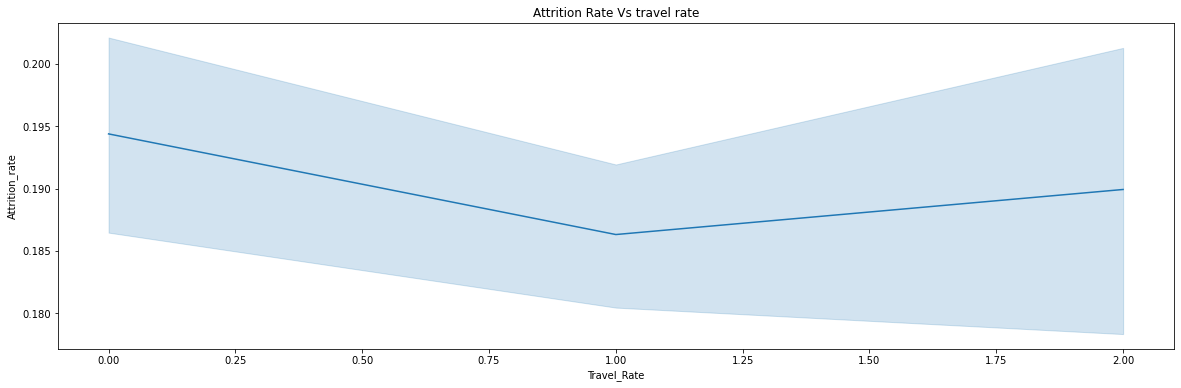

In [38]:
plt.figure(figsize=(20,6))
plt.title("Attrition Rate Vs travel rate")
sns.lineplot(y=data["Attrition_rate"],x=data["Travel_Rate"])

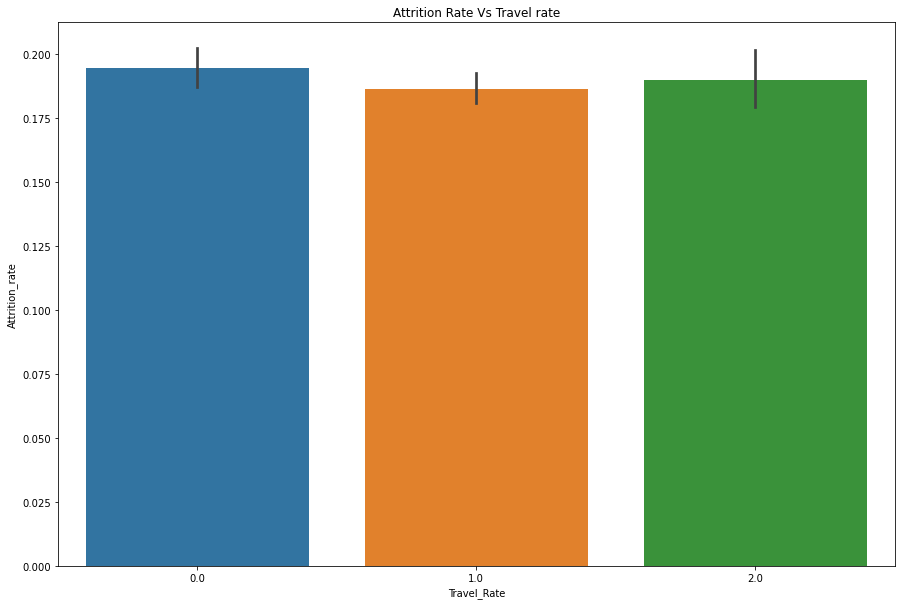

In [39]:
plt.figure(figsize= (15,10))
plt.title("Attrition Rate Vs Travel rate")
sns.barplot(y=data["Attrition_rate"],x=data["Travel_Rate"])

There are subtle differences between the decision making skills like conceptual, analytical and directive(Label encoded) with respect to attrition rates. It's completely optional to include this column or not. We will try to include this column in our model training and see the outcome.

## 12. Relationship with Compensation and benefits

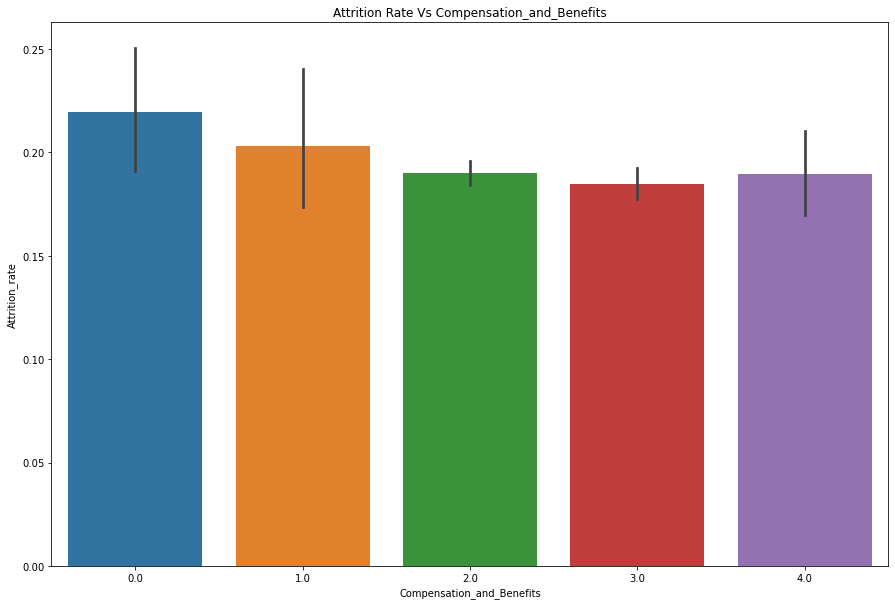

In [40]:
plt.figure(figsize= (15,10))
plt.title("Attrition Rate Vs Compensation_and_Benefits")
sns.barplot(y=data["Attrition_rate"],x=data["Compensation_and_Benefits"])

**This shows that compensation and benefits are an important factor in deciding employee attrition rates**

### 13. Now taking into account the various Anominised variables (VAR1, VAR2, VAR3, VAR4, VAR5, VAR6, VAR7)


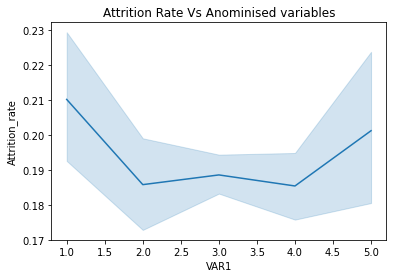

In [41]:
plt.title("Attrition Rate Vs Anominised variables")
sns.lineplot(y=data["Attrition_rate"],x=data["VAR1"])

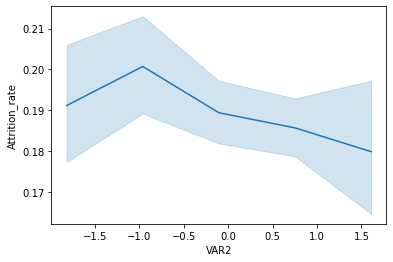

In [42]:
sns.lineplot(y=data["Attrition_rate"],x=data["VAR2"])

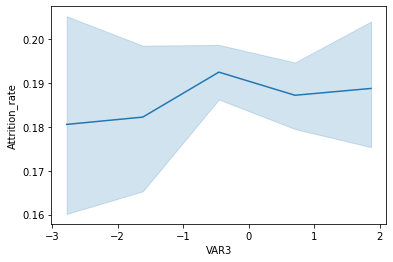

In [43]:
sns.lineplot(y=data["Attrition_rate"],x=data["VAR3"])

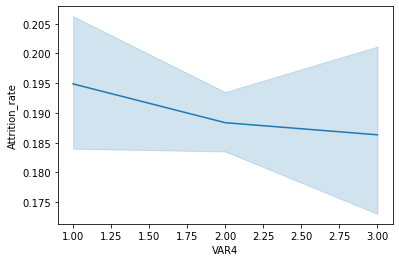

In [44]:
sns.lineplot(y=data["Attrition_rate"],x=data["VAR4"])

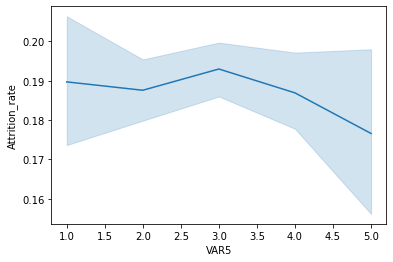

In [45]:
sns.lineplot(y=data["Attrition_rate"],x=data["VAR5"])

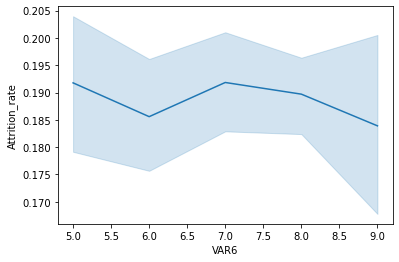

In [46]:
sns.lineplot(y=data["Attrition_rate"],x=data["VAR6"])

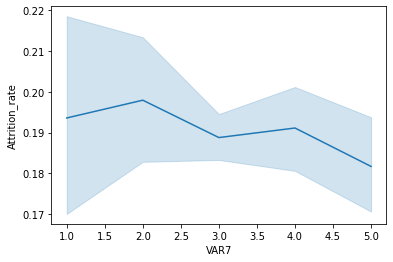

In [47]:
sns.lineplot(y=data["Attrition_rate"],x=data["VAR7"])

**We are going to include all the Anominised variables as all of them show some sortof relation wiht the target variable**

### Fianlly the columns selected for our model would be: 
* Anominised variables (VAR1, VAR2, VAR3, VAR4, VAR5, VAR6, VAR7)
* Compensation_and_Benefits
* Travel_Rate
* Pay_Scale
* Unit
* growth_rate
* Education_Level
* Time_of_service
* Age

### Let's develop the Correlation Matrix with heatmap
Correlation states how the features are related to each other or the target variable. Heatmap makes it easy to identify which features are most related to the target variable

[Text(0.5, 0, 'Gender'),
 Text(1.5, 0, 'Age'),
 Text(2.5, 0, 'Education_Level'),
 Text(3.5, 0, 'Relationship_Status'),
 Text(4.5, 0, 'Hometown'),
 Text(5.5, 0, 'Unit'),
 Text(6.5, 0, 'Decision_skill_possess'),
 Text(7.5, 0, 'Time_of_service'),
 Text(8.5, 0, 'Time_since_promotion'),
 Text(9.5, 0, 'growth_rate'),
 Text(10.5, 0, 'Travel_Rate'),
 Text(11.5, 0, 'Post_Level'),
 Text(12.5, 0, 'Pay_Scale'),
 Text(13.5, 0, 'Compensation_and_Benefits'),
 Text(14.5, 0, 'Work_Life_balance'),
 Text(15.5, 0, 'VAR1'),
 Text(16.5, 0, 'VAR2'),
 Text(17.5, 0, 'VAR3'),
 Text(18.5, 0, 'VAR4'),
 Text(19.5, 0, 'VAR5'),
 Text(20.5, 0, 'VAR6'),
 Text(21.5, 0, 'VAR7'),
 Text(22.5, 0, 'Attrition_rate')]

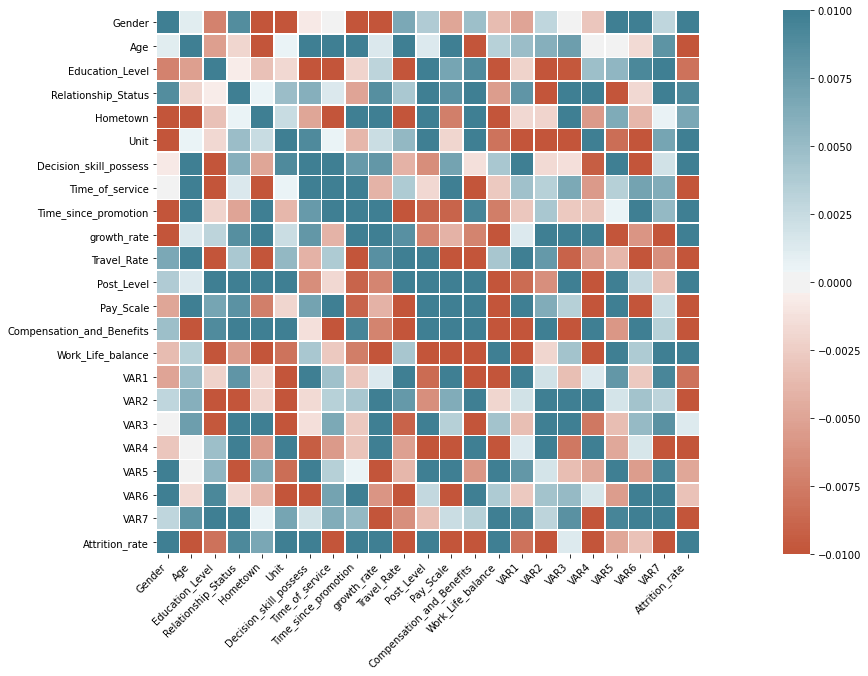

In [48]:
sample_data = data
plt.figure(figsize = (30,10))
corr = sample_data.corr()
ax = sns.heatmap(corr,vmin = -0.01,vmax = 0.01, center = 0,cmap=sns.diverging_palette(20, 220, n=200), square=True, linewidths = 0.5)

ax.set_xticklabels( ax.get_xticklabels(),rotation=45, horizontalalignment='right')

***From the last row of the correlation heat map we see the columns highly correlated to Attrition_rate are:***
* Gender
* Relationship_Status
* Hometown
* Unit
* Decision_skill_possess
* Time_since_promotion
* growth_rate
* Post_Level
* Work_Life_balance

In [49]:
data.columns

Index(['Gender', 'Age', 'Education_Level', 'Relationship_Status', 'Hometown',
       'Unit', 'Decision_skill_possess', 'Time_of_service',
       'Time_since_promotion', 'growth_rate', 'Travel_Rate', 'Post_Level',
       'Pay_Scale', 'Compensation_and_Benefits', 'Work_Life_balance', 'VAR1',
       'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7', 'Attrition_rate'],
      dtype='object')

## Building the ML model

**Let's split the training_dataframe into training and testing subsets.**

In [117]:
features_1 = ["Compensation_and_Benefits","Travel_Rate","Pay_Scale",
              "Unit","growth_rate","Education_Level","Time_of_service","Age"]

features_2 = ["Gender","Relationship_Status","Hometown","Unit",
              "Decision_skill_possess","Time_since_promotion",
              "growth_rate","Post_Level","Work_Life_balance"]

features_3 = data.columns[:-1]
# features_3 = features_3.remove("Attrition_rate")

X = data[features_3]
y = data["Attrition_rate"]

# Separating validation from training data
train_X, val_X, train_y, val_y = train_test_split(X,y,train_size=0.7, test_size=0.3,random_state = 0)



In [118]:
train_X.head()

,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
6590,0.0,64.0,4.0,0.0,3.0,3.0,0.0,10.0,2.0,71.0,...,6.0,3.0,2.0,3.0,0.7516,0.7075,2.0,2.0,5.0,3.0
2459,1.0,26.0,4.0,1.0,2.0,11.0,2.0,4.0,4.0,30.0,...,6.0,2.0,2.0,3.0,0.7516,0.7075,2.0,3.0,7.0,4.0
3276,0.0,64.0,5.0,0.0,3.0,1.0,0.0,29.0,3.0,57.0,...,8.0,2.0,1.0,4.0,0.7516,-0.4537,1.0,3.0,8.0,3.0
6226,1.0,65.0,3.0,0.0,4.0,2.0,0.0,39.0,1.0,42.0,...,2.0,2.0,1.0,3.0,-0.1048,-0.4537,2.0,1.0,9.0,1.0
2301,0.0,37.0,2.0,0.0,3.0,2.0,3.0,11.0,4.0,41.0,...,3.0,2.0,3.0,3.0,-0.1048,0.7075,2.0,2.0,5.0,4.0


### Model_1 : Random Forest

In [119]:
# Model selection and Training

random_forest_model = RandomForestRegressor(random_state = 1)
random_forest_model.fit(train_X,train_y)
model_rf_preds = random_forest_model.predict(val_X)
mae_score_rf = mean_absolute_error(val_y,model_rf_preds)
print("Mean absolute error with Random Forest = ",mae_score_rf)

Mean absolute error with Random Forest =  0.1365071338095238


* Mean absolute error with Random Forest with feature_1 =  0.13961009653174605
* Mean absolute error with Random Forest with feature_2 =  0.13989972828117914
* Mean absolute error with Random Forest with feature_3 =  0.1365071338095238

### Model_2 : XGBoost

In [120]:
# Model selection and training

def xgb_n_estimators_selection(x):
    xgb_model = XGBRegressor(n_estimators = x)
    xgb_model.fit(train_X,train_y)
    model_xgb_preds = xgb_model.predict(val_X)
    mae_score_xgb = mean_absolute_error(val_y,model_xgb_preds)
    return mae_score_xgb


Text(0, 0.5, 'MAE')

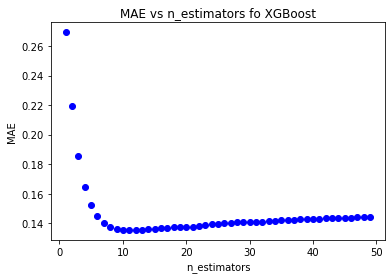

In [122]:
mae_list=[]
n_min = 0;
for i in range(1,50):
#     print("MAE with Extreme Gradient Boosting n_estimators of {val}  = {score} ".format(val = i,score = xgb_n_estimators_selection(i)))
    mae_list.append(xgb_n_estimators_selection(i))
    plt.plot(i,mae_list[i-1],'bo')
    
plt.title("MAE vs n_estimators fo XGBoost")
plt.xlabel("n_estimators")
plt.ylabel("MAE")

In [123]:
print("The best score is {val} at n_estimator of {n}".format(val=min(mae_list),n= mae_list.index(min(mae_list))))

The best score is 0.13556695061161403 at n_estimator of 11


**Therefore we will train our xgb model at n_estimators of 16. Another method will be to use `early_topping_rounds`**A small learning rate and large number of estimators will yield more accurate XGBoost models, though it will also take the model longer to train since it does more iterations through the cycle. As default, XGBoost sets learning_rate=0.1

In [124]:
xgbModel_updated = XGBRegressor(n_estimators = 500, learning_rate = 0.1,early_stopping_rounds = 20,
                  eval_set=[(val_X,val_y)], verbose = False)

xgbModel_updated.fit(train_X,train_y)


predictions_xgbModel_updated = xgbModel_updated.predict(val_X)
mae_xgbModel_updated = mean_absolute_error(predictions_xgbModel_updated,val_y)
print("MAE on updated XGB model= ",mae_xgbModel_updated)

[19:21:16] WARNING: /workspace/src/learner.cc:480: 
Parameters: { early_stopping_rounds, eval_set, verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


MAE on updated XGB model=  0.14689845076669966


But by a brute force approach we found out that the best mean_absolute_error is found out at n_estimators value of 11. So we will use that value to train out xgb_model.

### Cross validation on the final model

In [125]:
final_model =  XGBRegressor(n_estimators = 11)
# final_model = xgbModel_updated
cvScores = -1 * cross_val_score(final_model, X, y, cv = 5, scoring = 'neg_mean_absolute_error' )
print("Mae scores = :\n", cvScores)

Mae scores = :
 [0.13087857 0.12776524 0.13088884 0.13463671 0.13862072]


In [126]:
print("Best score = ", cvScores.min())
print("Worst score = ", cvScores.max())
print("Average score = ",cvScores.mean())
print("Standard deviation = ",(cvScores.std() * 100),"%")

Best score =  0.12776523927583014
Worst score =  0.13862072131037712
Average score =  0.1325580156045505
Standard deviation =  0.37324201733498896 %


### Let's predict the testing dataset on the final model and see the result
The trained model is completely unaware of the testing dataframe

In [129]:
final_model.fit(X,y)
# Generating prediction on the testing data
full_prediction = final_model.predict(X_valid_full)

**Now we will save the data to a CSV file if asked so that we can successfully submit it to competitons**

In [ ]:
output = pd.DataFrame({ 'Employee_ID':X_valid_full.index,
                       'Attrition_rate' : full_prediction
                      })
output.to_csv('submission1.csv', index = False)

In [103]:
# #graphical view
# #misclassification error
# range = [x for x in range(1,50) if x % 2 != 0]
# MSE = [1-x for x in cvScores]
# #optimal_n_estimators
# optimal_n_estimators_index = MSE.index(min(MSE))
# optimal_n_estimators = neighbors[optimal_n_estimators_index]
# print(optimal_k)

In [104]:
# #hyper parameter tuning.Selecting best K
# n_range = [x for x in range(1,50)]
# # empty list that will hold cv scores
# cv_scores = []
# for k in n_range:
#     xgb = XGBRegressor(n_estimators = k)
#     scores = cross_val_score(xgb, X, y, cv=10, scoring='accuracy')
#     cv_scores.append(scores.mean())
# #graphical view
# #misclassification error
# MSE = [1-x for x in cv_scores]
# #optimal n_estimators
# optimal_n_estimators_index = MSE.index(min(MSE))
# optimal_n_estimators = neighbors[optimal_n_estimators_index]
# print(optimal_n_estimators)
# # plot misclassification error vs k
# plt.plot(neighbors, MSE)
# plt.xlabel('n_estimators')
# plt.ylabel('Misclassification Error')
# plt.show()

**We will modify our function which helped us select the n_estimators value so that we can make use of cross validation to better fit our model **